# M1.D6: Vibrational levels of diatomic molecules

## Learning Objectives

* Introducing the Schrodinger equation for nuclear motion and proposing a harmonic approximation for its solution.
* Plotting the solution of the harmonic oscillation and graphically investigate how the energy levels are affected by the harmonic constant or frequency of vibration.
* Graphically investigate how the vibrational levels are affected by the bond strength and atomic mass.
* Plot the wavefunction for the quantum oscillator. Assess with plots how mass and bond strength affects the "quantumness" of the system.
* Use the pyscf package to calculate the frequency of vibration of heterodiatomic molecules. Compare these frequencies with experimental Infrared spectra.
* Discuss the harmonic approximation and when it is important to introduce anharmanocity

# The Schrodinger Equation of Nuclear Motion

In our previous sessions we have studied the electronic levels of atoms and molecules.
The electronic energy is the energy considering the kinetic and potential energy of electrons when nuclei are fixed at a given position. Using this approach (Born-Oppenheimer approximation) we have a Potential Energy Surface (defined as $U(r)$ where r are the nuclear coordinates) that is the potential where the nuclei move.

U(r) = Electronic energy + Repulsion between nuclei

Assuming that we have calculated $U(r)$ we can build the Hamiltonian and solve the whole Schrodinger equation with now considering the nuclear motion.

$$
\hat{H}_{nuclear} = \sum_{k=nuclei}-\frac{1}{2m_k}\nabla_{k} + U(r) 
$$

So we have a new differential equation to solve that depends on the nuclear coordinates "r" for any molecular system. 

$$
\sum_{k=nuclei}-\frac{1}{2m_k}\nabla_{k}\Psi(r) + U(r)\Psi(r) = E\Psi(r)
$$



# The harmonic approximation to nuclear motion

To simplify things, let's start with the simplest system, a diatomic molecule. Remember what we did for the hydrogen atom, when treating systems of two particles we can always reduce it as one particle of reduced mass $\mu$. In that case the Schrodinger equation of the nuclear motion is (in atomic units)

$$
-\frac{1}{2\mu}\frac{\delta^2\Psi(r)}{\delta r^2} + U(r)\Psi(r) = E\Psi(r)
$$

Remember that the potential U(r) comes from solving the electronic states for each nuclear position. This is a hard task and it makes the differential equation not to have an analytical solution.

Here comes the approximation. Let's assume that around the bond distance the potential is a parabola, or in physics terms, an harmonic potential

<img width="300" src="https://chem.libretexts.org/@api/deki/files/344391/5.3.2-1.svg?revision=2&size=bestfit&width=428&height=300" />

Remember from physics that the potential energy of an harmonic spring is

$$
E_{harmonic} = \frac{1}{2}kr^2
$$

We do this approximation because then the Schrodinger equation for the nuclear motion is solvable.

$$
-\frac{1}{2\mu}\frac{\delta^2\Psi(r)}{\delta r^2} + \frac{1}{2}kr^2\Psi(r) = E\Psi(r)
$$


A note here: We automagically simplified the nuclear coordinates "r" into just the distance between the atoms. Of course if we are using polar coordinates, besides "r" there will also be the other two angular coordinates ($\theta$ and $\phi$) that will be addressed later when considering molecular rotations. A molecule with 3N degrees of freedom (N being the number of nuclei) has 3 translational normal modes (along the x,y, and z axes), 3 rotational normal modes (around each of the three axes), and 3N-6 (the remaining number) different vibrational normal modes of motion.

The solutions are famously known as the [quantum harmonic oscillator](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator). The wavefunction (the eigenfunctions of the Schrodinger equation) is what is known as the Hermite polynomials and the energy (the eigenvalues of the Schrodinger equation) of the Quantum harmonic oscillator depends again on quantum number, the vibrational quantum number

$$
E = \hbar\sqrt{\frac{k}{\mu}} (v + \frac{1}{2}) \textrm{    where  } v = 0,1,2,3...
$$

the frequency of vibration is

$$
\omega = \sqrt{\frac{k}{\mu}}
$$

so the eigenstates can also be expressed as

$$
E = \hbar \omega (v + \frac{1}{2}) \textrm{    where    } v = 0,1,2,3...
$$

We will use the [classical harmonic oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator) to compare the quantum behavior with the classical one.

## The energy levels of the harmonic oscillator

* A molecule with 3N degrees of freedom (N being the number of nuclei) has 3 translational normal modes (along the x,y, and z axes), 3 rotational normal modes (around each of the three axes), and 3N-6 (the remaining number) different vibrational normal modes of motion. How many translational, rotational, and vibrational modes does a diatomic molecule have?
* Your turn. Plot the energy of the different vibrational levels. Use atomic units so that $\hbar=1$ and start with simple numbers of $k = 1,2,3$ or $\mu=1,2,3..$
* Investigate the role of the spring constant k and the mass of the system. You may use the plots below to overlap the energy levels.

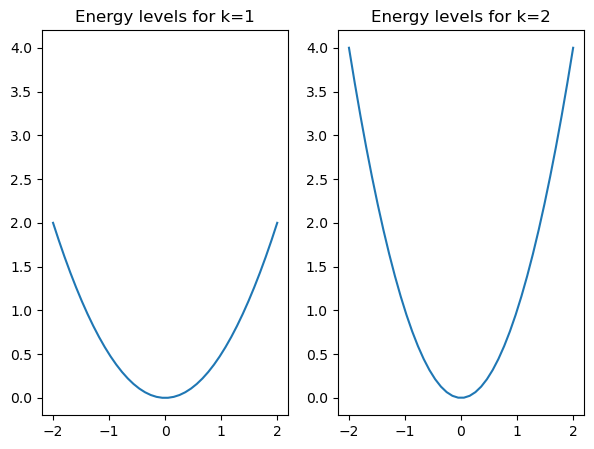

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
fig = plt.figure(figsize=(7,5))
ax1 = plt.subplot(121) #121 means: the subplots will be 1 row 2 columns and this one is subplot number 1
ax2 = plt.subplot(122, sharey = ax1) #share-y means that it will share the y-axis with the ax1 plot

k1 =1
k2 =2
x1 = np.linspace(-2,2.0,40)
x2 = np.linspace(-2,2.0,40)
ax1.plot(x1,0.5*k1*x1**2)
ax1.set_title("Energy levels for k="+str(k1))
ax2.plot(x2,0.5*k2*x2**2)
ax2.set_title("Energy levels for k="+str(k2));

## The harmonic oscillator wavefunctions



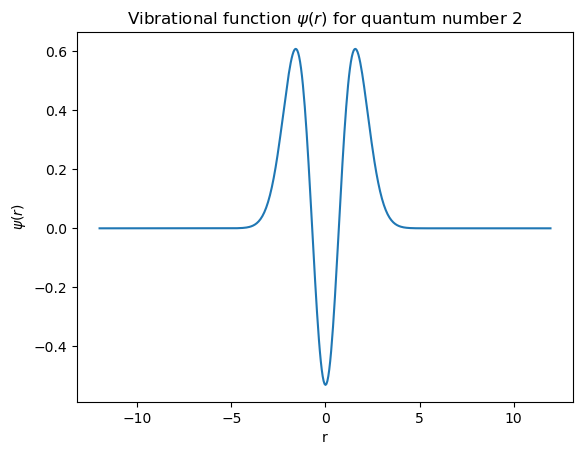

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import numpy.polynomial.hermite as Herm
import math

#Choose simple units
m=1.
w=1.
hbar=1.
#Discretized space
dx = 0.05
x_lim = 12
x = np.arange(-x_lim,x_lim,dx)

def hermite(x, n):
    xi = np.sqrt(m*w/hbar)*x
    herm_coeffs = np.zeros(n+1)
    herm_coeffs[n] = 1
    return Herm.hermval(xi, herm_coeffs)
  
def stationary_state(x,n):
    xi = np.sqrt(m*w/hbar)*x
    prefactor = 1./math.sqrt(2.**n * math.factorial(n)) * (m*w/(np.pi*hbar))**(0.25)
    psi = prefactor * np.exp(- xi**2 / 2) * hermite(x,n)
    return psi

v=2
plt.figure()
plt.plot(x, stationary_state(x,v))
plt.xlabel("r")
plt.ylabel(r"$\psi(r)$")
plt.title(r"Vibrational function $\psi(r)$ for quantum number "+str(v))
plt.show()

* Your turn: plot the first three wavefunctions of the quantum oscillator.
* Plot the square of the wavefunctions as it indicates the probability

## Using the classical harmonic oscillator to assess the "quantumness" of the system

It can be shown that for the classical harmonic oscillator [the classical probability density](https://en.wikipedia.org/wiki/Classical_probability_density) is the probability depends on the maximum amplitude $A$ of the oscillator

$$
P(r) = \frac{1}{\pi}\frac{1}{\sqrt{A^2 - r^2}}
$$

The maximum amplitude is when the oscillator only has potential energy and zero kinetic energy. So if we solve for r in the potential energy we obtain the amplitude


$$
E_{pot} = \frac{1}{2}kr^2
$$

so

$$
r_{max} = A = \sqrt{\frac{2E}{k}}
$$

or in terms of frequency and mass, since $k = m\omega^2$

$$
r_{max} = A = \sqrt{\frac{2E}{m\omega^2}}
$$


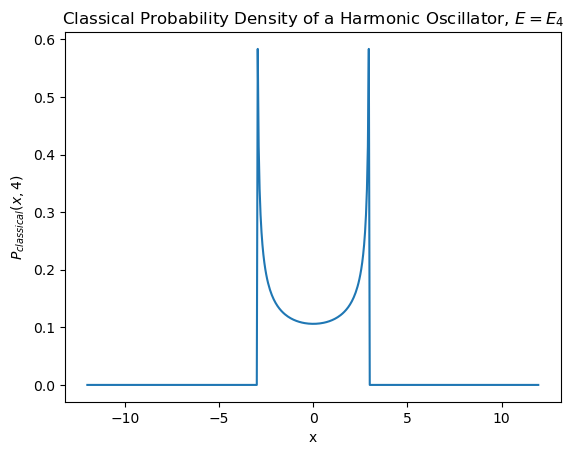

In [4]:
#source: UCD_Chem_110A%3A_Physical_Chemistry_I_(Larsen)/Text/05%3A_The_Harmonic_Oscillator_and_the_Rigid_Rotor/5.I%3A_Interactive_Worksheets/5.I1%3A_Simple_Harmonic_Oscillator_-_Plotting_Eigenstates
import matplotlib.pyplot as plt 
import numpy as np

#Choose simple units
m=1.
w=1.
hbar=1.
#Discretized space
dx = 0.05
x_lim = 12
x = np.arange(-x_lim,x_lim,dx)

def classical_P(x,n):
    E = hbar*w*(n+0.5)
    x_max = np.sqrt(2*E/(m*w**2))
    classical_prob = np.zeros(x.shape[0])
    x_inside = abs(x) < (x_max - 0.025)
    classical_prob[x_inside] = 1./np.pi/np.sqrt(x_max**2-x[x_inside]*x[x_inside])
    return classical_prob

plt.figure()
plt.plot(x, classical_P(x,4))
plt.xlabel("x")
plt.ylabel("$P_{classical}(x,4)$")
plt.title("Classical Probability Density of a Harmonic Oscillator, $E=E_4$")
plt.show()

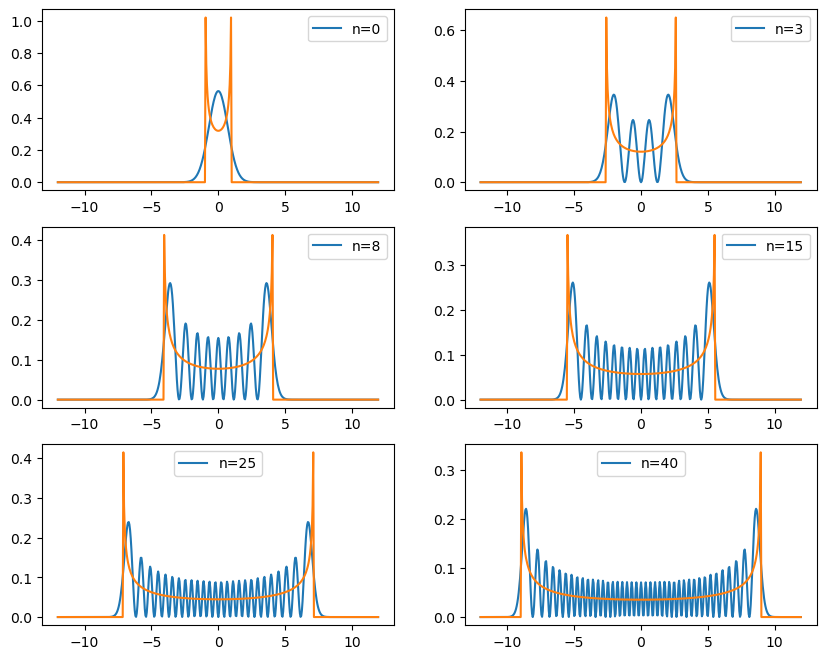

In [5]:
import matplotlib.pyplot as plt 
import numpy
import numpy.polynomial.hermite as Herm
import math

#Choose simple units
m=1.
w=1.
hbar=1.
#Discretized space
dx = 0.05
x_lim = 12
x = numpy.arange(-x_lim,x_lim,dx)

def hermite(x, n):
    xi = numpy.sqrt(m*w/hbar)*x
    herm_coeffs = numpy.zeros(n+1)
    herm_coeffs[n] = 1
    return Herm.hermval(xi, herm_coeffs)
def stationary_state(x,n):
    xi = numpy.sqrt(m*w/hbar)*x
    prefactor = 1./math.sqrt(2.**n * math.factorial(n)) * (m*w/(numpy.pi*hbar))**(0.25)
    psi = prefactor * numpy.exp(- xi**2 / 2) * hermite(x,n)
    return psi
  
def classical_P(x,n):
    E = hbar*w*(n+0.5)
    x_max = numpy.sqrt(2*E/(m*w**2))
    classical_prob = numpy.zeros(x.shape[0])
    x_inside = abs(x) < (x_max - 0.025)
    classical_prob[x_inside] = 1./numpy.pi/numpy.sqrt(x_max**2-x[x_inside]*x[x_inside])
    return classical_prob

plt.figure(figsize=(10, 8))
plt.subplot(3,2,1)
plt.plot(x, numpy.conjugate(stationary_state(x,0))*stationary_state(x,0), label="n=0")
plt.plot(x, classical_P(x,0))
plt.legend()
plt.subplot(3,2,2)
plt.plot(x, numpy.conjugate(stationary_state(x,3))*stationary_state(x,3), label="n=3")
plt.plot(x, classical_P(x,3))
plt.legend()
plt.subplot(3,2,3)
plt.plot(x, numpy.conjugate(stationary_state(x,8))*stationary_state(x,8), label="n=8")
plt.plot(x, classical_P(x,8))
plt.legend()
plt.subplot(3,2,4)
plt.plot(x, numpy.conjugate(stationary_state(x,15))*stationary_state(x,15), label="n=15")
plt.plot(x, classical_P(x,15))
plt.legend()
plt.subplot(3,2,5)
plt.plot(x, numpy.conjugate(stationary_state(x,25))*stationary_state(x,25), label="n=25")
plt.plot(x, classical_P(x,25))
plt.legend()
plt.subplot(3,2,6)
plt.plot(x, numpy.conjugate(stationary_state(x,40))*stationary_state(x,40), label="n=40")
plt.plot(x, classical_P(x,40))
plt.legend()
plt.show()

* What conclusions do you extract from the above computational comparisons? When does a quantum oscillator compare to a classical oscillator?

# Infrared spectroscopy

Remember that in our previous session we were able to calculate a frequency analysis of molecules (from the second derivative of the energy). These calculations can give us a good approximation to the peaks of absorbance in Infrared Spectroscopy.

Let's run a frequency analysis of carbon monoxide. Notice that first we must optimize the structure so that the frequency analysis 

In [1]:
#pip install geometric

from pyscf import gto, scf
from pyscf.geomopt.geometric_solver import optimize
from pyscf.hessian import thermo
from pyscf import lib

# Convert from Bohr to Angstroms
bohr_to_angstrom = lib.parameters.BOHR 

molCO = gto.M(
    atom = 'O 0 0 0; C 0 0 1.3',  # in Angstrom
    basis = '631g',
    symmetry = True,
    charge=0, 
    spin=0,
    verbose=3,
    output='m1d6_co_fq.out'
)
# Perform the Hartree-Fock calculation
co_sp = molCO.RHF.run()
co_opt = optimize(co_sp).run()
print("Optimized CO structure:")
print(co_opt.atom_coords()*bohr_to_angstrom)
hessian = co_sp.Hessian().kernel()

# Frequency analysis
freq_info = thermo.harmonic_analysis(co_sp.mol, hessian)

overwrite output file: m1d6_co_fq.out


geometric-optimize called with the following command line:
/Users/pratr001/miniconda3/envs/pchem/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/pratr001/Library/Jupyter/runtime/kernel-v30bf7441fdfe734567d2f39bf552819b8eeaaf6cd.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%

Optimized CO structure:
[[0.         0.         0.08466366]
 [0.         0.         1.21533634]]


In [17]:
print(freq_info)

{'freq_error': 0, 'freq_au': array([0.23108101]), 'freq_wavenumber': array([1187.86897303]), 'norm_mode': array([[[ 0.        ,  0.        , -0.1637143 ],
        [ 0.        ,  0.        ,  0.21807219]]]), 'reduced_mass': array([13.44847911]), 'vib_temperature': array([1709.07897771]), 'force_const_au': array([0.05339843]), 'force_const_dyne': array([11.18048088])}


In [ ]:
from pyscf.hessian.rhf import Hessian
# Compute the Hessian for frequency analysis
mf = scf.RHF(co_opt).run()
hessian_calculator = Hessian(mf)
hessian_matrix = hessian_calculator.kernel()

import numpy as np
# Convert Hessian to vibrational frequencies (in cm⁻¹)
frequencies = np.linalg.eigvalsh(hessian_matrix)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor for atomic units to cm⁻¹

# Print results
print("Optimized CO structure:")
print(co_opt.atom_coords())
print("\nVibrational frequencies (in cm⁻¹):")
print(frequencies)

Optimized CO structure:
[[0.         0.         0.15999114]
 [0.         0.         2.29665282]]

Vibrational frequencies (in cm⁻¹):
[[[   6.20971779    6.20971926 5985.86892547]
  [5985.86892548    6.20971022    6.20971021]]

 [[5985.86892548    6.20971022    6.20971021]
  [   6.20970714    6.20970733 5985.86892548]]]


* Look at the calculation above: find the force constant and the reduced mass of the CO molecule. Use the formula relating those to find the frequency of vibration. Notice that it's giving you the wavenumber in cm-1. How are those magnitudes related?
* Your turn: Choose 3 other diatomic molecules. Based on the information that the calculations are giving you, plot the energy levels of each. (Do not use symmetric molecules N2, O2... as only molecules with dipole will absorb in the IR spectrum)
* Find online the experimental frequency of absorption of your molecules and compare them with your results.

# Anharmonic corrections


We can use the [Morse potential](https://en.wikipedia.org/wiki/Morse_potential)

$$
E(r) = D(1-e^{a(r-r_{eq})})^2
$$

Where D is the depth of the well (bond energy), $r_{eq}$ is the equilibrium bond distance, and "a" is related to the square root of the force constant

$$
a = \sqrt{\frac{k}{2D}}
$$

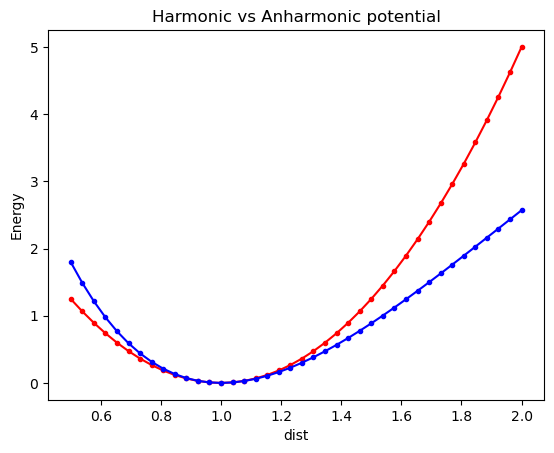

In [13]:
import matplotlib.pyplot as plt 
import numpy as np
fig, ax = plt.subplots()
#the x axis is the atomic number

distances = np.linspace(0.5,2.0,40)

k = 10
req = 1
D = 10
a = np.sqrt(k/(2*D))

harmEne = []
anharmEne = []
for r in distances:
    harmEne.append( 1/2*k*(r - req)**2 )
    anharmEne.append ( D*(1 - np.exp(-a*(r-req)))**2)

ax.plot(distances,harmEne,'.r-')
ax.plot(distances,anharmEne,'.b-')
ax.set_xlabel("dist")
ax.set_ylabel("Energy")
ax.set_title("Harmonic vs Anharmonic potential");

* How do you think adding anharmonicity will affect the vibrational levels? Will they be equally distanced? Will they be further apart than in the harmonic potential?

#  Questions

* Submit in a separate notebook the questions listed above